In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)
        if 'train' in file:
            trainset = file
        else:
            testset = file

print(trainset)

# Any results you write to the current directory are saved as output.

/kaggle/input/suspended-substances-prediction-in-river-water/train.csv


In [2]:
ds_train = pd.read_csv(trainset)
ds_train.head()

Id  target     1     2   3   4   5   6   7
0   0   33.35  29.9  34.1 NaN NaN NaN NaN NaN
1   3   25.40  58.5  30.7 NaN NaN NaN NaN NaN
2   4   12.30  35.6  10.0 NaN NaN NaN NaN NaN
3   5   13.80  26.6  45.8 NaN NaN NaN NaN NaN
4   6   65.00  49.0  99.0 NaN NaN NaN NaN NaN

In [3]:
ds_train.rename(columns={"1": "ssc_st1", "2": "ssc_st2", "3":"ssc_st3", "4": "ssc_st4", "5": "ssc_st5", "6":"ssc_st6", "7": "ssc_st7"}, inplace=True)
ds_train.head()

Id  target  ssc_st1  ssc_st2  ssc_st3  ssc_st4  ssc_st5  ssc_st6  ssc_st7
0   0   33.35     29.9     34.1      NaN      NaN      NaN      NaN      NaN
1   3   25.40     58.5     30.7      NaN      NaN      NaN      NaN      NaN
2   4   12.30     35.6     10.0      NaN      NaN      NaN      NaN      NaN
3   5   13.80     26.6     45.8      NaN      NaN      NaN      NaN      NaN
4   6   65.00     49.0     99.0      NaN      NaN      NaN      NaN      NaN

In [4]:
ds_train.describe()

Id      target     ssc_st1     ssc_st2    ssc_st3    ssc_st4  \
count  147.000000  147.000000  145.000000  145.000000  32.000000  31.000000   
mean   101.401361   13.387279   14.215310   13.990828  23.509375  26.362903   
std     64.836640    8.381463    9.046203   10.802702  13.008889  20.113942   
min      0.000000    3.000000    4.000000    4.000000   9.000000   4.000000   
25%     41.500000    9.000000    8.500000    8.500000  14.875000  15.500000   
50%    102.000000   11.000000   12.000000   11.000000  19.050000  20.600000   
75%    158.500000   16.100000   18.000000   17.000000  28.125000  27.250000   
max    214.000000   65.000000   66.900000   99.000000  59.500000  94.000000   

         ssc_st5    ssc_st6    ssc_st7  
count  33.000000  37.000000  37.000000  
mean   25.049697  18.881351  15.535405  
std    13.626976  10.757773   8.502962  
min     6.000000   0.210000   0.280000  
25%    16.400000  11.000000  10.200000  
50%    20.000000  16.000000  14.000000  
75%    31.000000  26.000000  21.400000  
max    62.500000  44.000000  37.000000

In [5]:
ds_train.isna().sum()

Id           0
target       0
ssc_st1      2
ssc_st2      2
ssc_st3    115
ssc_st4    116
ssc_st5    114
ssc_st6    110
ssc_st7    110
dtype: int64

For columns 3 to 7 there are a lot of missing values (less than 25% available).
Drop that data and use only the measurements from first two stations.

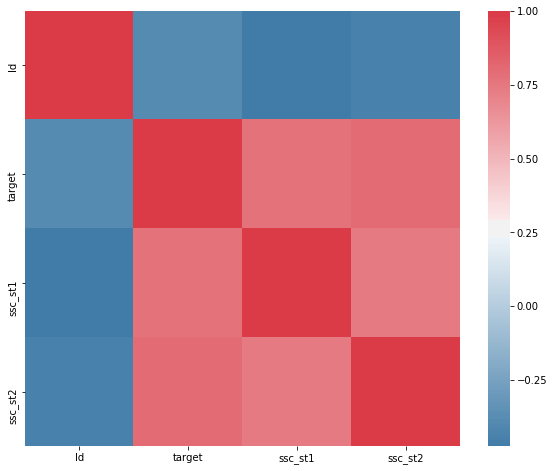

In [6]:
ds_train_s = ds_train.drop(['ssc_st3', 'ssc_st4', 'ssc_st5', 'ssc_st6', 'ssc_st7'], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
corr = ds_train_s.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)


In [7]:
from sklearn.model_selection import train_test_split
y = ds_train_s['target']
ds_train_s.drop(['target'], axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X_t, X_v, y_t, y_v = train_test_split(ds_train_s, y, test_size=0.2, random_state=72)

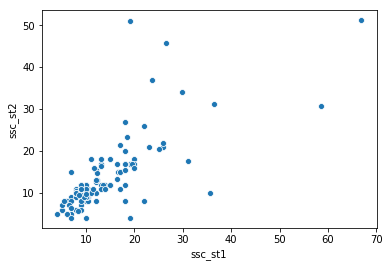

In [9]:
import seaborn as sns
sns.scatterplot(x='ssc_st1', y='ssc_st2', data=X_t)


(<matplotlib.collections.PathCollection at 0x7f9ff0b33fd0>,
 <matplotlib.collections.PathCollection at 0x7f9ff0b3e400>)

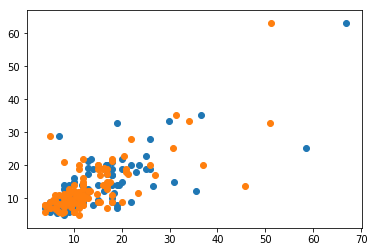

In [10]:
plt.scatter(X_t['ssc_st1'], y_t), plt.scatter(X_t['ssc_st2'], y_t)

In [11]:
X_t['ssc_st1'].fillna((X_t['ssc_st1'].mean()), inplace=True)
X_t['ssc_st2'].fillna((X_t['ssc_st2'].mean()), inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
X_t.describe()

Id     ssc_st1     ssc_st2
count  117.000000  117.000000  117.000000
mean   100.350427   14.163652   13.614261
std     61.359219    9.171145    8.456698
min      0.000000    4.000000    4.000000
25%     48.000000    9.000000    9.000000
50%    102.000000   11.670000   11.000000
75%    153.000000   18.000000   16.330000
max    211.000000   66.900000   51.200000

In [13]:
y_t.describe()

count    117.000000
mean      13.348376
std        7.641353
min        5.000000
25%        9.000000
50%       11.000000
75%       16.200000
max       63.100000
Name: target, dtype: float64

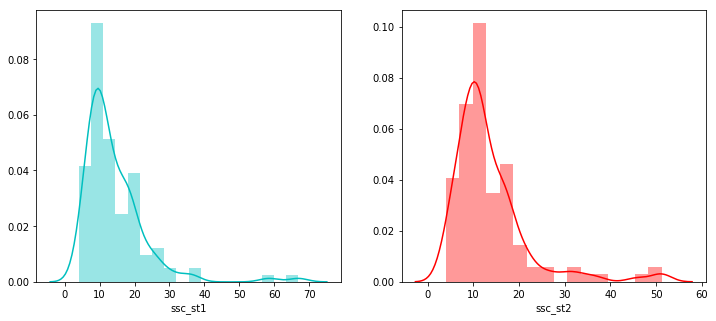

In [14]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(X_t['ssc_st1'],color='c',ax=ax)

ax=f.add_subplot(122)
sns.distplot(X_t['ssc_st2'],color='r',ax=ax)

In [15]:
X_t.ssc_st1.loc[X_t.ssc_st1 > 40]  = 40
X_t.ssc_st2.loc[X_t.ssc_st2 > 40]  = 40

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression().fit(X_t,y_t)
print(lr.score(X_v,y_v))

0.8904790218672614


In [17]:
X_v.isnull().sum()

Id         0
ssc_st1    0
ssc_st2    0
dtype: int64

In [18]:
lr_train_pred = lr.predict(X_t)
lr_val_pred = lr.predict(X_v)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_t,lr_train_pred),
mean_squared_error(y_v,lr_val_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_t,lr_train_pred),
r2_score(y_v,lr_val_pred)))

MSE train data: 25.948, MSE test data: 12.712
R2 train data: 0.552, R2 test data: 0.890


In [19]:
y_v.head()

88      8.0
146    10.0
14     15.5
99     11.0
141    25.0
Name: target, dtype: float64

In [20]:
lr_val_pred[:5]

array([12.01296621,  9.63073916, 14.04999456, 11.29361093, 12.91888498])

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 72,
                              n_jobs = -1)
forest.fit(X_t,y_t)
forest_train_pred = forest.predict(X_t)
forest_val_pred = forest.predict(X_v)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_t,forest_train_pred),
mean_squared_error(y_v,forest_val_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_t,forest_train_pred),
r2_score(y_v,forest_val_pred)))

MSE train data: 6.612, MSE test data: 32.868
R2 train data: 0.886, R2 test data: 0.717


In [22]:
forest_val_pred[:5]

array([12.2453,  9.851 , 18.0193, 11.18  , 15.4263])

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=0.5, random_state=72)
gbrt.fit(X_t, y_t)
gbrt_train_pred = gbrt.predict(X_t)
gbrt_val_pred = gbrt.predict(X_v)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_t,gbrt_train_pred),
mean_squared_error(y_v,gbrt_val_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_t,gbrt_train_pred),
r2_score(y_v,gbrt_val_pred)))


MSE train data: 9.540, MSE test data: 20.269
R2 train data: 0.835, R2 test data: 0.825


In [24]:
gbrt_train_pred[:5]

array([ 9.48631279, 17.82014952, 16.31955737,  8.60317919,  7.43642791])

In [25]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.7, random_state=72)
svm_reg.fit(X_t, y_t)

svr_train_pred = svm_reg.predict(X_t)
svr_val_pred = svm_reg.predict(X_v)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_t,svr_train_pred),
mean_squared_error(y_v,svr_val_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_t,svr_train_pred),
r2_score(y_v,svr_val_pred)))

MSE train data: 27.542, MSE test data: 12.529
R2 train data: 0.524, R2 test data: 0.892


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
from sklearn.model_selection import GridSearchCV
lsvr = LinearSVR()
param_grid = { 'C':[0.05, 0.075], 'epsilon':[1.25, 1.3, 1.4, 1.5, 1.45, 1.55], 'random_state':[72]}
grid = GridSearchCV(lsvr, param_grid, n_jobs=-1)
grid.fit(X_t, y_t)

grid_train_pred = grid.predict(X_t)
grid_val_pred = grid.predict(X_v)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_t,grid_train_pred),
mean_squared_error(y_v,grid_val_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_t,grid_train_pred),
r2_score(y_v,grid_val_pred)))



/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


MSE train data: 26.958, MSE test data: 11.515
R2 train data: 0.534, R2 test data: 0.901


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
grid.best_params_

{'C': 0.05, 'epsilon': 1.5, 'random_state': 72}

In [28]:
y_v.head()

88      8.0
146    10.0
14     15.5
99     11.0
141    25.0
Name: target, dtype: float64

In [29]:
y_vn = np.asarray(y_v)
y_vn

array([ 8.  , 10.  , 15.5 , 11.  , 25.  , 65.  ,  6.  ,  9.  , 16.  ,
       11.  , 17.9 ,  4.  , 12.  ,  3.  ,  7.  ,  6.  , 19.  ,  8.  ,
       19.  , 10.  ,  8.67,  7.  , 13.5 , 11.  , 16.  , 14.  , 16.5 ,
        9.5 , 10.  , 17.6 ])

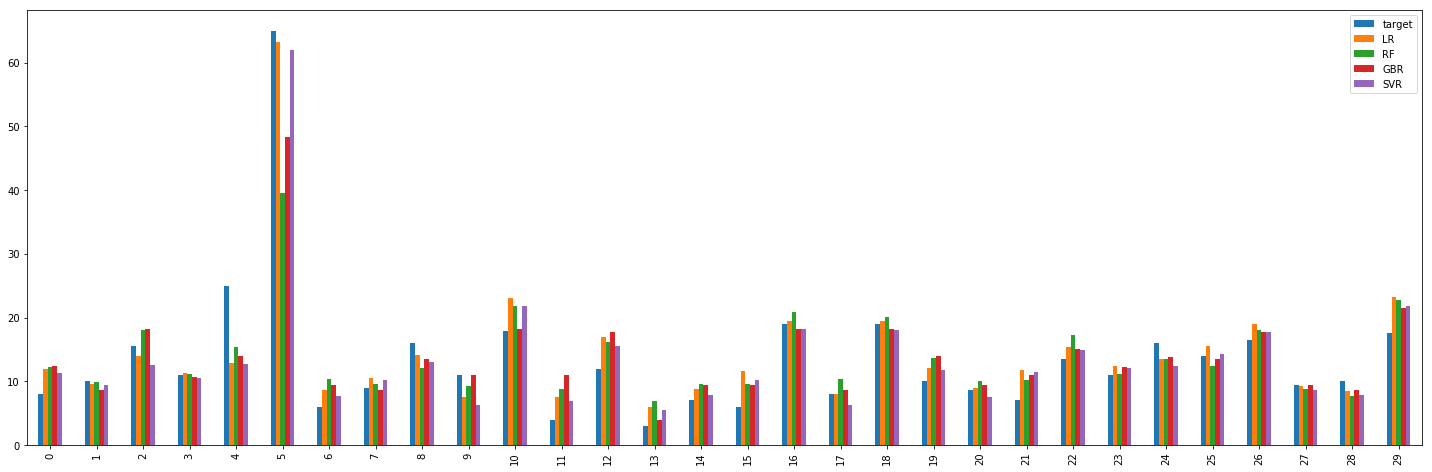

In [30]:
pl = pd.DataFrame(np.column_stack((y_v,lr_val_pred,forest_val_pred, gbrt_val_pred, grid_val_pred)))
pl.rename(columns={0:'target', 1:'LR', 2:'RF', 3:'GBR', 4:'SVR'}, inplace=True)
pl.plot.bar(figsize=(25,8))

In [31]:
pl.head()

target         LR       RF        GBR        SVR
0     8.0  12.012966  12.2453  12.395858  11.342475
1    10.0   9.630739   9.8510   8.603179   9.460050
2    15.5  14.049995  18.0193  18.266106  12.574358
3    11.0  11.293611  11.1800  10.669002  10.521880
4    25.0  12.918885  15.4263  13.955914  12.754712

Ridge Regression

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ts = sc.fit_transform(X_t)
X_vs = sc.fit_transform(X_v)

from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.5, random_state=72)
clf.fit(X_ts, y_t)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=72, solver='auto', tol=0.001)

In [33]:
clf.score(X_vs, y_v)

0.7361856819397885

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01, random_state=72)
lasso_reg.fit(X_ts, y_t)
lasso_reg.score(X_vs, y_v)

0.7362488853227924

In [35]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=-0.9, l1_ratio=1, fit_intercept=True, precompute=True, tol=0.5)
elastic_net.fit(X_ts, y_t)
elastic_net.score(X_vs, y_v)

0.8227369594357529